In [1]:
pip install emukit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257056 sha256=ddb71d6c6229e513b2d641120814fd248db2c983eacf0f796cce35e21202ecd5
  Stored in directory: /root/.cache/pip/wheels/30/d1/af/64ddede19b5eb77bd70362edebf9d393bf77dc34d354c11292
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102548 sha256=295c5060b610a6373

In [2]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [3]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/LinewssDNS.csv') 
#RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/LinewssRANS.csv') 
DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/lineexploitDNSzero.csv') 
RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/lineexploitRANSzero.csv') 
# 
# RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/WSSLowcostRANS_zero.csv') 




Mounted at /content/drive


In [40]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0]])

DNS_full=DNS_data.dropna(axis=1)
DNS_full=DNS_full.values
DNS=DNS_full[:,[0,2,3,7,8,10]]
DNS=DNS[50:100,:]

DNS_test=DNS_full[:,[1,4,5,6,9]]
DNS_test=DNS_test[50:100,:]

RANS=RANS_data.dropna(axis=1)
RANS_full=RANS.values

RANS_test=RANS_full[:,[0,1,3,4,5,6,7,10,12,13,14,15,16,17,19]]
RANS=RANS_full[50:100,:]
RANS_test=RANS_test[50:100,:]
#D_70_100=np.array(DNS_data['70_100'])
#D_70_100=D_70_100.reshape(-1,1)
#np.stack(())
#print(column_values.shape)

DNS_full=np.transpose(DNS_full)
y_train_h=np.transpose(DNS)
y_train_l=np.transpose(RANS)


print(np.shape(y_train_h))
print(np.shape(y_train_l))

(6, 50)
(20, 50)


In [49]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)


(50, 1)
(50, 1)


In [6]:
# x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]   
# x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]   
# X_train=np.append(x_train_l,x_train_h,axis=0)
# 
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

# Y_train=np.append(y_train_h,y_train_l,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

print(X_train)

(26, 3)
(26, 50)
[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [7]:
## Create standard GP model using only high-fidelity data
x_train_DNS=x_train_h
y_train_DNS=y_train_h
kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,5.0],variance=0.0001, ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,10000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(0.0001)

## Fit the GP model

high_gp_model.optimize_restarts(100)


Optimization restart 1/100, f = -766.0542802235551
Optimization restart 2/100, f = -766.0542402983122
Optimization restart 3/100, f = -766.0542812425878
Optimization restart 4/100, f = -766.054281242594
Optimization restart 5/100, f = -766.054281241277
Optimization restart 6/100, f = -766.0540561975585
Optimization restart 7/100, f = -766.0542812416304
Optimization restart 8/100, f = -766.0535443253392
Optimization restart 9/100, f = -766.0542812349356
Optimization restart 10/100, f = -766.0540815317648
Optimization restart 11/100, f = -766.0542800902801
Optimization restart 12/100, f = -766.0542812412233
Optimization restart 13/100, f = -766.0542812425359
Optimization restart 14/100, f = -766.0542643228512
Optimization restart 15/100, f = -766.0542573941372
Optimization restart 16/100, f = -766.0542811522813
Optimization restart 17/100, f = -766.0542811317331
Optimization restart 18/100, f = -766.0541504461037
Optimization restart 19/100, f = -766.0533272069508
Optimization restart 20

In [8]:
print(high_gp_model.ExpQuad.lengthscale[0])
print(high_gp_model.ExpQuad.lengthscale[1])
print(high_gp_model.ExpQuad.variance)
print(high_gp_model.gradient)
# Get the gradients of optimization
gradients_dns = high_gp_model.gradient

# Get the names of the model's parameters
parameter_dns = high_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_dns)):
    print(f"Parameter: {parameter_dns[i]} - Gradient: {gradients_dns[i]}")


43.73232782434138
10000.0
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      0.00675450  |   0.0,10.0    |        
[ 3.02179913e-05 -5.33918580e-09  2.29576818e-05 -5.41605687e+05]
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 3.0217991265005336e-05
Parameter: ExpQuad.lengthscale - Gradient: -5.339185796812921e-09
Parameter: Gaussian_noise.variance - Gradient: 2.295768177050487e-05


In [9]:
## Create standard GP model using only low-fidelity data

x_train_RANS= np.array([[70,100],[70,80],[70,30],[70,0],[60,100],[60,80],[60,50],[50,100],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,0]])

y_train_RANS=np.transpose(RANS_test)
print(y_train_RANS.shape)

(15, 50)


In [10]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.999999999634228
Variable 2: 3.65771934971317e-10


In [11]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9999808752007956
Variable 2: 1.9124799204416844e-05


In [12]:
kernelRANS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.05, ARD=True)
kernelRANS.lengthscale.constrain_bounded(0,1000)
kernelRANS.variance.constrain_bounded(0,10)
low_gp_model = GPy.models.GPRegression(x_train_RANS, y_train_RANS, kernelRANS)
low_gp_model.Gaussian_noise.fix(0.001)

## Fit the GP model


low_gp_model.optimize_restarts(500)

Optimization restart 1/500, f = -1613.0932509472136


 /usr/local/lib/python3.10/dist-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 2/500, f = -1554.1742317835528
Optimization restart 3/500, f = -1613.3619172659794
Optimization restart 4/500, f = -1613.3635243318242
Optimization restart 5/500, f = -1613.3611161143742
Optimization restart 6/500, f = -1613.3635372369913
Optimization restart 7/500, f = -1613.3635367266124
Optimization restart 8/500, f = -1554.1732557160956
Optimization restart 9/500, f = -1613.363040420323
Optimization restart 10/500, f = -1613.363536703575
Optimization restart 11/500, f = -1613.3635344386146
Optimization restart 12/500, f = -1613.3635173349949
Optimization restart 13/500, f = -1554.1727644629864
Optimization restart 14/500, f = -1554.1737100608782
Optimization restart 15/500, f = -1613.363537547869
Optimization restart 16/500, f = -1613.3635365634564
Optimization restart 17/500, f = -1613.3635377191124
Optimization restart 18/500, f = -1613.3629627555486
Optimization restart 19/500, f = -1613.3635243819836
Optimization restart 20/500, f = -1605.641265663827
Optim

In [13]:
print(low_gp_model.ExpQuad.lengthscale[0])
print(low_gp_model.ExpQuad.lengthscale[1])
print(low_gp_model.ExpQuad.variance)

# Get the gradients of optimization
gradients_rans = low_gp_model.gradient

# Get the names of the model's parameters
parameter_rans = low_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_rans)):
    print(f"Parameter: {parameter_rans[i]} - Gradient: {gradients_rans[i]}")


37.146187301301424
999.9997445633353
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      0.00246493  |   0.0,10.0    |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 0.00885902457294694
Parameter: ExpQuad.lengthscale - Gradient: 2.90502242998813e-07
Parameter: Gaussian_noise.variance - Gradient: 0.0006814332953285971


In [14]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9986220613987646
Variable 2: 0.0013779386012354323


In [15]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.9999980960453763
Variable 2: 1.9039546237832803e-06


In [16]:
# Print the interaction terms
print("Interaction Terms:")
for i in range(len(sensitivity)):
    for j in range(i+1, len(sensitivity)):
        interaction = sensitivity[i] * sensitivity[j]
        print(f"Variable {i+1} x Variable {j+1}: {interaction}")


Interaction Terms:
Variable 1 x Variable 2: 4.403342694199008e-15


In [17]:
kernels = [GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True),GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True)]
# for kernel in kernels:
#     kernel.lengthscale.constrain_bounded(0, 50)
#     kernel.variance.constrain_bounded(0, 10)
for i, kernel in enumerate(kernels):
    if i == 0:  # First fidelity
        kernel.lengthscale.constrain_bounded(0,1000)
        kernel.variance.constrain_bounded(0, 5)
    elif i == 1:  # Second fidelity
        kernel.lengthscale.constrain_bounded(0, 1000)
        kernel.variance.constrain_bounded(0, 10)   
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0.01)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0.00001)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=50)

## Fit the model
  
lin_mf_model.optimize()

Optimization restart 1/50, f = -2194.8389101740295
Optimization restart 2/50, f = -2194.839019828439
Optimization restart 3/50, f = -2194.8389411092967
Optimization restart 4/50, f = -2194.838746225566
Optimization restart 5/50, f = -2194.8354523534604
Optimization restart 6/50, f = -2194.839018805761
Optimization restart 7/50, f = -2194.839009481401
Optimization restart 8/50, f = -2194.833729311547
Optimization restart 9/50, f = -2194.8390139627804
Optimization restart 10/50, f = -2194.8388983184736
Optimization restart 11/50, f = -2194.839012578074
Optimization restart 12/50, f = -2164.506618084322
Optimization restart 13/50, f = -1849.018486421526
Optimization restart 14/50, f = -2194.8390190401756
Optimization restart 15/50, f = -2194.839019404609
Optimization restart 16/50, f = -2194.839005010869
Optimization restart 17/50, f = -2194.8389269259733
Optimization restart 18/50, f = -2194.8390145750277
Optimization restart 19/50, f = -2194.8390193176947
Optimization restart 20/50, f =

In [18]:
 print(gpy_lin_mf_model)


Name : gp
Objective : -2194.839023011297
Number of Parameters : 9
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |                   value  |  constraints  |  priors
  multifidelity.ExpQuad.variance         |    0.004125102272849275  |    0.0,5.0    |        
  multifidelity.ExpQuad.lengthscale      |                    (2,)  |  0.0,1000.0   |        
  multifidelity.ExpQuad_1.variance       |  1.2788167494164578e-16  |   0.0,10.0    |        
  multifidelity.ExpQuad_1.lengthscale    |                    (2,)  |  0.0,1000.0   |        
  multifidelity.scale                    |      1.2616240950020476  |               |        
  mixed_noise.Gaussian_noise.variance    |                    0.01  |   +ve fixed   |        
  mixed_noise.Gaussian_noise_1.variance  |                   1e-05  |   +ve fixed   |        


In [19]:
  print(gpy_lin_mf_model.multifidelity.ExpQuad.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad.lengthscale)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.lengthscale)

  index  |  gp.multifidelity.ExpQuad.variance  |  constraints  |  priors
  [0]    |                         0.00412510  |    0.0,5.0    |        
  index  |  gp.multifidelity.ExpQuad_1.variance  |  constraints  |  priors
  [0]    |                           0.00000000  |   0.0,10.0    |        
  index  |  gp.multifidelity.ExpQuad.lengthscale  |  constraints  |  priors
  [0]    |                           34.43435632  |  0.0,1000.0   |        
  [1]    |                         1000.00000000  |  0.0,1000.0   |        
  index  |  gp.multifidelity.ExpQuad_1.lengthscale  |  constraints  |  priors
  [0]    |                            530.35992673  |  0.0,1000.0   |        
  [1]    |                              0.00344803  |  0.0,1000.0   |        


In [20]:
# Get the gradients of optimization
gradients_mf = gpy_lin_mf_model.multifidelity.gradient

# Get the names of the model's parameters
parameter_mf = gpy_lin_mf_model.multifidelity.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_mf)):
    print(f"Parameter: {parameter_mf[i]} - Gradient: {gradients_mf[i]}")

Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: -0.14361430383408202
Parameter: ExpQuad.lengthscale - Gradient: 7.442781985945466e-05
Parameter: ExpQuad_1.variance - Gradient: 0.01745060414496191
Parameter: ExpQuad_1.lengthscale - Gradient: -948007.6388467712
Parameter: scale - Gradient: 2.8242046560880313e-17


In [21]:

#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,30],[60,0],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]   
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]  

In [22]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(X_plot_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(X_plot_h)

In [23]:
# print(np.amax(hf_mean_lin_mf_model))
print(np.sqrt(hf_var_lin_mf_model)*1.96)
print(np.sqrt(hf_var_high_gp_model)*1.96)
print(np.sqrt(lf_var_low_gp_model)*1.96)
# c=(hf_mean_lin_mf_model.shape)
# print(c)



[[0.00754558]
 [0.00807977]
 [0.00883713]
 [0.00784008]
 [0.00766426]]
[[0.02333279]
 [0.02243206]
 [0.02244726]
 [0.02243009]
 [0.02333501]]
[[0.06659856]
 [0.06469797]
 [0.06486995]
 [0.06458668]
 [0.06642569]]


In [24]:
print(hf_mean_lin_mf_model)
print(hf_mean_high_gp_model)
print(lf_mean_low_gp_model)

[[0.00553509 0.00736369 0.00734206 0.00899313 0.01068318 0.01278477
  0.01557375 0.01902995 0.02324403 0.02831125 0.03466695 0.04217481
  0.05074098 0.06043286 0.0717502  0.0840724  0.09756756 0.1120965
  0.12743701 0.14291939 0.1579853  0.1722419  0.18452565 0.19335343
  0.19779036 0.19781212 0.19145524 0.1780246  0.15926171 0.13471473
  0.10559199 0.07534386 0.04863892 0.02735388 0.01633574 0.01444306
  0.01181844 0.00899718 0.00643637 0.00524837 0.00422308 0.00345871
  0.00281598 0.00232656 0.00196471 0.00168675 0.00147596 0.00134115
  0.00125087 0.00120971]
 [0.00429123 0.00549075 0.00547212 0.00686116 0.00834965 0.0100982
  0.01243849 0.0152784  0.01868204 0.02273671 0.02766936 0.03335526
  0.03971035 0.0467539  0.05473631 0.06326409 0.07239025 0.08196805
  0.09177537 0.10138193 0.11050807 0.11885339 0.12564786 0.1300598
  0.13163459 0.13045116 0.12534725 0.11606638 0.10363082 0.0878272
  0.06939239 0.05042157 0.03331782 0.01928832 0.01115201 0.00919092
  0.00820724 0.00740534 0.0

(50, 1)
(50, 1)


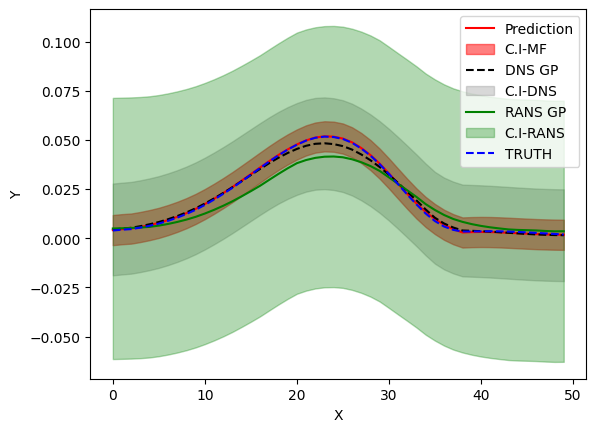

In [65]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig,ax=plt.subplots()
#DNS_test.shape[0]
i=4
x_pred = np.linspace(0,49,50).reshape(-1, 1)
# Calculate upper and lower confidence bounds
confidence = 1.96 # 95% confidence interval (approximate)
lower_bound = hf_mean_lin_mf_model[i]- confidence * np.sqrt(hf_var_lin_mf_model[i])
upper_bound = hf_mean_lin_mf_model[i]+ confidence * np.sqrt(hf_var_lin_mf_model[i])
ax.plot(hf_mean_lin_mf_model[i],color='r',label='Prediction')
ax.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='red', alpha=0.5, label='C.I-MF')



#for i in range(1):
#ax.fill_between((hf_mean_lin_mf_model[0] - 1.96*hf_std_lin_mf_model[0]).flatten(), 
#(hf_mean_lin_mf_model[0] + 1.96*hf_std_lin_mf_model[0]).flatten(), color='r', alpha=0.3)
# ax.plot(RANS_test[:,i],color='k',linestyle='dotted',label='RANS')
ax.plot(hf_mean_high_gp_model[i],color='black',linestyle='--',label='DNS GP')
lower_bound_dns = hf_mean_high_gp_model[i]- confidence * np.sqrt(hf_var_high_gp_model[i])
upper_bound_dns = hf_mean_high_gp_model[i]+ confidence * np.sqrt(hf_var_high_gp_model[i])
ax.fill_between(x_pred.flatten(), lower_bound_dns.flatten(), upper_bound_dns.flatten(), color='gray', alpha=0.3, label='C.I-DNS')
ax.plot(lf_mean_low_gp_model[i],color='green',label='RANS GP')
lower_bound_rans = lf_mean_low_gp_model[i]- confidence * np.sqrt(lf_var_low_gp_model[i])
upper_bound_rans = lf_mean_low_gp_model[i]+ confidence * np.sqrt(lf_var_low_gp_model[i])
ax.fill_between(x_pred.flatten(), lower_bound_rans.flatten(), upper_bound_rans.flatten(), color='green', alpha=0.3, label='C.I-RANS')
ax.plot(DNS_test[:,i],color='b',linestyle='--',label='TRUTH')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


x_data=x_pred 
y_truth=DNS_test[:,i].reshape(-1,1)

print(y_truth.shape)
print(x_data.shape)
write_truth = np.stack((x_data,y_truth), axis = 1).reshape(-1,2)


e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30Mag.dat', write_truth, delimiter='  ', header='Position\tMean', comments='' )
# np.savetxt('MF_70_e50_dns5_rans_8.dat', zip(write_mf), fmt=['%.3f','%.3f'])
# np.savetxt('LF_70_e50_dns5_rans_8.dat', zip(x_data,y_lf), fmt=['%.3f','%.3f'])
# np.savetxt('HF_70_e50_dns5_rans_8.dat', zip(x_data,y_hf), fmt=['%.3f','%.3f'])

In [26]:
import numpy as np

# Example data arrays


# Create a structured array with position and mean as fields
data = np.zeros(len(position), dtype=[('Position', int), ('Mean', int)])
data['Position'] = position
data['Mean'] = mean

# Save the structured array to a .dat file
np.savetxt('data.dat', data, delimiter='\t', header='Position\tMean', comments='')

print("Data saved to data.dat")

NameError: ignored

In [ ]:
print(np.sqrt(hf_var_high_gp_model[i]))
# print(x_pred)
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

In [28]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)
i=0
x_data=x_pred 
y_data=hf_mean_lin_mf_model[i].reshape(-1,1)
y_hf=hf_mean_high_gp_model[i].reshape(-1,1)
y_lf=lf_mean_low_gp_model[i].reshape(-1,1)
print(y_data.shape)
print(x_data.shape)
write_mf = np.stack((x_data,y_data), axis = 1).reshape(-1,2)
write_lf = np.stack((x_data,y_lf), axis = 1).reshape(-1,2)
write_hf = np.stack((x_data,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)

e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MF_40_e30.dat', write_mf, delimiter='  ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/LF_40_e30.dat', write_lf, delimiter='   ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/HF_40_e30.dat', write_hf, delimiter='   ', header='Position\tMean', comments='' )

(50, 1)
(50, 1)
(50, 2)


(50, 1)
(50, 1)


In [ ]:
# # Define the range of x values for prediction
# x_pred = np.linspace(0,50, 50).reshape(-1, 1)

# # Predict mean and variance at the given x values
# mean, var = model.predict(x_pred)

# # Calculate upper and lower confidence bounds
# confidence = 1.96  # 95% confidence interval (approximate)
# lower_bound = mean - confidence * np.sqrt(var)
# upper_bound = mean + confidence * np.sqrt(var)

# # Plot the data points, mean, and confidence interval
# plt.scatter(X_train, Y_train, color='red', label='Training data')
# plt.plot(x_pred, mean, color='blue', label='Mean')
# plt.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label='Confidence interval')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('GPy Model Predictions with Confidence Interval')
# plt.legend()
# plt.show()

In [ ]:
fig,ax=plt.subplots()
for i in range(hf_mean_lin_mf_model.shape[0]):
   ax.plot(hf_mean_lin_mf_model[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


In [ ]:
# i=4
# y_true=DNS_test[:,i].reshape(-1,1)
# # y_rans=RANS_test[:,i].reshape(-1,1)


# write_truth = np.stack((x_data,y_true), axis = 1).reshape(-1,2)
# # write_rans = np.stack((x_data,y_rans), axis = 1).reshape(-1,2)


# np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30.dat', write_truth, delimiter='  ' )
# np.savetxt('/content/drive/MyDrive/ColabNotebooks/RANS_70_e50.dat', write_rans, delimiter='   ' )


In [ ]:
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

In [ ]:
DNS_test=np.transpose(DNS_test)
fig,ax=plt.subplots()
for i in range(DNS_test.shape[1]):
   ax.plot(DNS_test[:,i])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(hf_mean_lin_mf_model[2],color='r',linestyle='dotted',label='Prediction')


In [ ]:

fig,ax=plt.subplots()
for i in range(RANS_full.shape[1]):
   ax.plot(RANS_full[:,i])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [ ]:
  print(DNS_test[0])


In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel('HF(x)')
plt.xlabel('LF(x)')

plt.plot(y_train_l[[0,2,4,7,8,10],:], y_train_h, color='purple',marker='*',)
plt.title('Mapping from low fidelity to high fidelity')
plt.legend(['HF-LF Correlation'], loc='lower center');